In [188]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt


In [189]:
# Loading the dataset
path1 = 'train1_data/'
path2 = 'train2_data/'

sg_B1 = np.load(path1 + 'sg_B.npy')
sg_C1 = np.load(path1 + 'sg_C.npy')
sg_D1 = np.load(path1 + 'sg_D.npy')
sg_E1 = np.load(path1 + 'sg_E.npy')
sg_F1 = np.load(path1 + 'sg_F.npy')
sg_G1 = np.load(path1 + 'sg_G.npy')
sg_H1 = np.load(path1 + 'sg_H.npy')
sg_I1 = np.load(path1 + 'sg_I.npy')
BDF_distance1 = np.load(path1 + 'BDF_distance.npy')


spike_A1 = np.load(path1 + 'spike_A.npy')
spike_B1 = np.load(path1 + 'spike_B.npy')
spike_C1 = np.load(path1 + 'spike_C.npy')
spike_D1 = np.load(path1 + 'spike_D.npy')
spike_abs_B1 = np.load(path1 + 'spike_abs_B.npy')
spike_abs_C1 = np.load(path1 + 'spike_abs_C.npy')
spike_abs_D1 = np.load(path1 + 'spike_abs_D.npy')

spike_B_lower_noise1 = np.load(path1 + 'spike_B_lower_noise.npy')
spike_C_lower_noise1 = np.load(path1 + 'spike_C_lower_noise.npy')
spike_abs_B_lower_noise1 = np.load(path1 + 'spike_abs_B_lower_noise.npy')
spike_abs_C_lower_noise1 = np.load(path1 + 'spike_abs_C_lower_noise.npy')

BCD_distance1 = np.load(path1 + 'BCD_distance.npy')
BCD_abs_distance1 = np.load(path1 + 'BCD_abs_distance.npy')

sg_B2 = np.load(path2 + 'sg_B.npy')
sg_C2 = np.load(path2 + 'sg_C.npy')
sg_D2 = np.load(path2 + 'sg_D.npy')
sg_E2 = np.load(path2 + 'sg_E.npy')
sg_F2 = np.load(path2 + 'sg_F.npy')
sg_G2 = np.load(path2 + 'sg_G.npy')
sg_H2 = np.load(path2 + 'sg_H.npy')
sg_I2 = np.load(path2 + 'sg_I.npy')
BDF_distance2 = np.load(path2 + 'BDF_distance.npy')


spike_A2 = np.load(path2 + 'spike_A.npy')
spike_B2 = np.load(path2 + 'spike_B.npy')
spike_C2 = np.load(path2 + 'spike_C.npy')
spike_D2 = np.load(path2 + 'spike_D.npy')
spike_abs_B2 = np.load(path2 + 'spike_abs_B.npy')
spike_abs_C2 = np.load(path2 + 'spike_abs_C.npy')
spike_abs_D2 = np.load(path2 + 'spike_abs_D.npy')

spike_B_lower_noise2 = np.load(path2 + 'spike_B_lower_noise.npy')
spike_C_lower_noise2 = np.load(path2 + 'spike_C_lower_noise.npy')
spike_abs_B_lower_noise2 = np.load(path2 + 'spike_abs_B_lower_noise.npy')
spike_abs_C_lower_noise2 = np.load(path2 + 'spike_abs_C_lower_noise.npy')

BCD_distance2 = np.load(path2 + 'BCD_distance.npy')
BCD_abs_distance2 = np.load(path2 + 'BCD_abs_distance.npy')

# Concatenate the data
sg_B = np.concatenate((sg_B1, sg_B2), axis=0)
sg_C = np.concatenate((sg_C1, sg_C2), axis=0)
sg_D = np.concatenate((sg_D1, sg_D2), axis=0)
sg_E = np.concatenate((sg_E1, sg_E2), axis=0)
sg_F = np.concatenate((sg_F1, sg_F2), axis=0)
sg_G = np.concatenate((sg_G1, sg_G2), axis=0)
sg_H = np.concatenate((sg_H1, sg_H2), axis=0)
sg_I = np.concatenate((sg_I1, sg_I2), axis=0)
BDF_distance = np.concatenate((BDF_distance1, BDF_distance2), axis=0)


spike_A = np.concatenate((spike_A1, spike_A2), axis=0)
spike_B = np.concatenate((spike_B1, spike_B2), axis=0)
spike_C = np.concatenate((spike_C1, spike_C2), axis=0)
spike_D = np.concatenate((spike_D1, spike_D2), axis=0)
spike_abs_B = np.concatenate((spike_abs_B1, spike_abs_B2), axis=0)
spike_abs_C = np.concatenate((spike_abs_C1, spike_abs_C2), axis=0)
spike_abs_D = np.concatenate((spike_abs_D1, spike_abs_D2), axis=0)

spike_B_lower_noise = np.concatenate((spike_B_lower_noise1, spike_B_lower_noise2), axis=0)
spike_C_lower_noise = np.concatenate((spike_C_lower_noise1, spike_C_lower_noise2), axis=0)
spike_abs_B_lower_noise = np.concatenate((spike_abs_B_lower_noise1, spike_abs_B_lower_noise2), axis=0)
spike_abs_C_lower_noise = np.concatenate((spike_abs_C_lower_noise1, spike_abs_C_lower_noise2), axis=0)

BCD_distance = np.concatenate((BCD_distance1, BCD_distance2), axis=0)
BCD_abs_distance = np.concatenate((BCD_abs_distance1, BCD_abs_distance2), axis=0)

output1 = pd.read_csv('train1/00_Wear_data.csv').loc[:, 'MaxWear']
output2 = pd.read_csv('train2/00_Wear_data.csv').loc[:, 'MaxWear']
Output = pd.concat([output1, output2], axis=0).values

In [190]:
spike_B_sum = spike_B.sum(axis=1)
spike_C_sum = spike_C.sum(axis=1)
spike_D_sum = spike_D.sum(axis=1)

spike_B_lower_noise_sum = spike_B_lower_noise.sum(axis=1)
spike_C_lower_noise_sum = spike_C_lower_noise.sum(axis=1)

spike_B_sg_B_sum = np.array([spike_B[i]-sg_B[i] for i in range(len(spike_B))]).sum(axis=1)
spike_C_sg_D_sum = np.array([spike_C[i]-sg_D[i]
                       for i in range(len(spike_C))]).sum(axis=1)
spike_D_sg_F_sum = np.array([spike_D[i]-sg_F[i]
                       for i in range(len(spike_D))]).sum(axis=1)


In [191]:
train1_len = 46

df2 = pd.DataFrame()
integrated_spike_B1 = [sum(abs(spike_B_sum[:i]))
                       for i in range(1, train1_len+1)]
integrated_spike_B2 = [sum(abs(spike_B_sum[train1_len+1:i]))
                       for i in range(train1_len+1, len(spike_B_sum)+1)]
integrated_spike_B = integrated_spike_B1 + integrated_spike_B2
df2['integrated_spike_B'] = pd.Series(integrated_spike_B)


integrated_spike_C1 = [sum(abs(spike_C_sum[:i]))
                       for i in range(1, train1_len+1)]
integrated_spike_C2 = [sum(abs(spike_C_sum[train1_len+1:i]))
                       for i in range(train1_len+1, len(spike_C_sum)+1)]
integrated_spike_C = integrated_spike_C1 + integrated_spike_C2
df2['integrated_spike_C'] = pd.Series(integrated_spike_C)

integrated_spike_D1 = [sum(abs(spike_D_sum[:i]))
                       for i in range(1, train1_len+1)]
integrated_spike_D2 = [sum(abs(spike_D_sum[train1_len+1:i]))
                       for i in range(train1_len+1, len(spike_D_sum)+1)]
integrated_spike_D = integrated_spike_D1 + integrated_spike_D2
df2['integrated_spike_D'] = pd.Series(integrated_spike_D)

integrated_spike_B_lower_noise1 = [sum(abs(
    spike_B_lower_noise_sum[:i]))for i in range(1, train1_len+1)]
integrated_spike_B_lower_noise2 = [sum(abs(
    spike_B_lower_noise_sum[train1_len+1:i]))for i in range(train1_len+1, len(spike_B_lower_noise_sum)+1)]
integrated_spike_B_lower_noise = integrated_spike_B_lower_noise1 + \
    integrated_spike_B_lower_noise2
df2['integrated_spike_B_lower_noise'] = pd.Series(
    integrated_spike_B_lower_noise)

integrated_spike_C_lower_noise1 = [sum(abs(
    spike_C_lower_noise_sum[:i]))for i in range(1, train1_len+1)]
integrated_spike_C_lower_noise2 = [sum(abs(
    spike_C_lower_noise_sum[i-1:i]))for i in range(train1_len+1, len(spike_C_lower_noise_sum)+1)]
integrated_spike_C_lower_noise = integrated_spike_C_lower_noise1 + \
    integrated_spike_C_lower_noise2
df2['integrated_spike_C_lower_noise'] = pd.Series(
    integrated_spike_C_lower_noise)

integrated_spike_B_sg_B1 = [sum(abs(spike_B_sg_B_sum[:i]))
                            for i in range(1, train1_len+1)]
integrated_spike_B_sg_B2 = [sum(abs(spike_B_sg_B_sum[train1_len+1:i]))
                            for i in range(train1_len+1, len(spike_B_sg_B_sum)+1)]
integrated_spike_B_sg_B = integrated_spike_B_sg_B1 + integrated_spike_B_sg_B2
df2['integrated_spike_B_sg_B'] = pd.Series(integrated_spike_B_sg_B)

integrated_spike_C_sg_D1 = [sum(abs(spike_C_sg_D_sum[:i]))
                            for i in range(1, train1_len+1)]
integrated_spike_C_sg_D2 = [sum(abs(spike_C_sg_D_sum[train1_len+1:i]))
                            for i in range(train1_len+1, len(spike_C_sg_D_sum)+1)]
integrated_spike_C_sg_D = integrated_spike_C_sg_D1 + integrated_spike_C_sg_D2
df2['integrated_spike_C_sg_D'] = pd.Series(integrated_spike_C_sg_D)

integrated_spike_D_sg_F1 = [sum(abs(spike_D_sg_F_sum[:i]))
                            for i in range(1, train1_len+1)]
integrated_spike_D_sg_F2 = [sum(abs(spike_D_sg_F_sum[train1_len+1:i]))
                            for i in range(train1_len+1, len(spike_D_sg_F_sum)+1)]
integrated_spike_D_sg_F = integrated_spike_D_sg_F1 + integrated_spike_D_sg_F2
df2['integrated_spike_D_sg_F'] = pd.Series(integrated_spike_D_sg_F)

sg_C_sum = sg_C.sum(axis=1)
integrated_sg_C_sum1 = [sum(abs(sg_C_sum[:i]))
                        for i in range(1, train1_len+1)]
integrated_sg_C_sum2 = [sum(abs(sg_C_sum[train1_len+1:i]))
                        for i in range(train1_len+1, len(sg_C_sum)+1)]
integrated_sg_C_sum = integrated_sg_C_sum1 + integrated_sg_C_sum2
df2['integrated_sg_C_sum'] = pd.Series(integrated_sg_C_sum)

df2['Output'] = pd.Series(Output)

columns = df2.columns
transformer = StandardScaler()
corr = pd.DataFrame(transformer.fit_transform(df2), columns=columns).corr()
print(corr.iloc[-1, :])


integrated_spike_B                0.927961
integrated_spike_C                0.934113
integrated_spike_D                0.938540
integrated_spike_B_lower_noise    0.920061
integrated_spike_C_lower_noise    0.803822
integrated_spike_B_sg_B           0.933373
integrated_spike_C_sg_D           0.940401
integrated_spike_D_sg_F           0.938536
integrated_sg_C_sum               0.879207
Output                            1.000000
Name: Output, dtype: float64


In [192]:
print(df2.columns)
Model = df2.values
Input = Model[:, :-1]
output = Model[:, -1]
output = np.reshape(output, (-1, 1))

Input_shape = Input.shape[1]

print('Input layer 0: ', Input[0, :10])
print('Output layer ~ 10: ', output[:10])

Input_transformer = MaxAbsScaler()
Output_transformer = StandardScaler()

Input = Input_transformer.fit_transform(Input)
Output = Output_transformer.fit_transform(output)

print('Input layer 0: ', Input[0, :10])


Index(['integrated_spike_B', 'integrated_spike_C', 'integrated_spike_D',
       'integrated_spike_B_lower_noise', 'integrated_spike_C_lower_noise',
       'integrated_spike_B_sg_B', 'integrated_spike_C_sg_D',
       'integrated_spike_D_sg_F', 'integrated_sg_C_sum', 'Output'],
      dtype='object')
Input layer 0:  [2.50166390e+01 9.57113200e+00 9.91540000e-01 6.76586250e+00
 2.59152500e+00 2.00785639e+02 8.65901320e+01 9.91540000e-01
 8.23949464e-02]
Output layer ~ 10:  [[0.10236723]
 [0.13203094]
 [0.18754876]
 [0.19920984]
 [0.22729473]
 [0.26207539]
 [0.2838152 ]
 [0.30276893]
 [0.31918277]
 [0.33329432]]
Input layer 0:  [0.0181653  0.00746002 0.01006404 0.0023528  0.00850592 0.02846079
 0.02465728 0.01006098 0.0009187 ]


In [193]:
input_train, input_test, output_train, output_test = train_test_split(
    Input, output, test_size=0.1, random_state=42)
print('input_train.shape:\t', input_train.shape)
print('input_test.shape:\t', input_test.shape)
print('output_train.shape:\t', output_train.shape)
print('output_test.shape:\t', output_test.shape)

input_train = tf.convert_to_tensor(input_train)
input_test = tf.convert_to_tensor(input_test)
output_train = tf.convert_to_tensor(output_train)
output_test = tf.convert_to_tensor(output_test)


input_train.shape:	 (63, 9)
input_test.shape:	 (7, 9)
output_train.shape:	 (63, 1)
output_test.shape:	 (7, 1)


In [194]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=Input_shape))
#model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1280      
                                                                 
 dense_34 (Dense)            (None, 4)                 516       
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [195]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


learning_rate = 0.0005
batch_size = 15
epochs = 1000


# Adam RMSprop
model.compile(optimizer=tf.optimizers.Adam(
    learning_rate=learning_rate), loss=rmse)

start = time.time()
history = model.fit(input_train, output_train,
                    validation_data=(input_test, output_test), 
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=1)
end = time.time()

print('\n\n')
print('Training cost time:\t', end - start, 's')
print('\n\n')


Epoch 1/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.2572 - val_loss: 0.1789
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1570 - val_loss: 0.1190
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1355 - val_loss: 0.0875
Epoch 4/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1329 - val_loss: 0.0789
Epoch 5/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1193 - val_loss: 0.0746
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1004 - val_loss: 0.0758
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0813 - val_loss: 0.0720
Epoch 8/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0733 - val_loss: 0.0563
Epoch 9/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.0651 - val_loss: 0.0511
Epoch 10/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.0602 - val_loss: 0.0476
Epoch 11/1000


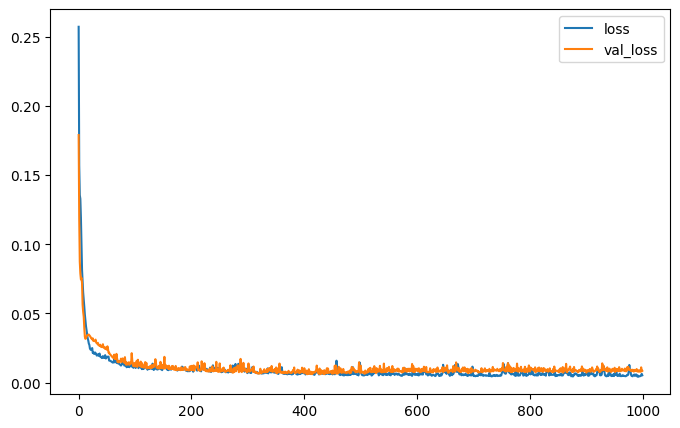

In [196]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()


In [197]:
def numpy_rmse(actual, predict):
    return pow(np.mean(pow(actual - predict, 2)), 0.5)


test_predict = model.predict(input_test)
test_predict_actual = output_test.numpy()

test_predict = np.array(test_predict)

test_predict = Output_transformer.inverse_transform(test_predict)
test_predict_actual = Output_transformer.inverse_transform(test_predict_actual)

test_RMSE = numpy_rmse(test_predict_actual, test_predict)
print('Test: ')
print('Test RMSE:\t', test_RMSE)


1/1 [==============================] - 0s 27ms/step
Test: 
Test RMSE:	 0.00128065527779953


In [198]:
train_predict = model.predict(input_train)
train_predict_actual = output_train.numpy()

train_predict = Output_transformer.inverse_transform(train_predict)
train_predict_actual = Output_transformer.inverse_transform(
    train_predict_actual)

train_RMSE = numpy_rmse(train_predict_actual, train_predict)
print('\n\n\n')
print('Train: ')
print('Train RMSE:\t', train_RMSE)


2/2 [==============================] - 0s 3ms/step




Train: 
Train RMSE:	 0.0008463858412094719


In [199]:
total_predict = model.predict(Input)
total_predict_actual = output

total_predict = Output_transformer.inverse_transform(total_predict)
total_predict_actual = Output_transformer.inverse_transform(
    total_predict_actual)

total_RMSE = numpy_rmse(total_predict_actual, total_predict)
print('\n\n\n')
print('Total: ')
print('Total RMSE:\t', total_RMSE)


3/3 [==============================] - 0s 4ms/step




Total: 
Total RMSE:	 0.0008992996647588932


In [200]:
path3 = 'test_data/'

sg_B = np.load(path3 + 'sg_B.npy')
sg_C = np.load(path3 + 'sg_C.npy')
sg_D = np.load(path3 + 'sg_D.npy')
sg_E = np.load(path3 + 'sg_E.npy')
sg_F = np.load(path3 + 'sg_F.npy')
sg_G = np.load(path3 + 'sg_G.npy')
sg_H = np.load(path3 + 'sg_H.npy')
sg_I = np.load(path3 + 'sg_I.npy')
BDF_distance = np.load(path3 + 'BDF_distance.npy')


spike_A = np.load(path3 + 'spike_A.npy')
spike_B = np.load(path3 + 'spike_B.npy')
spike_C = np.load(path3 + 'spike_C.npy')
spike_D = np.load(path3 + 'spike_D.npy')
spike_abs_B = np.load(path3 + 'spike_abs_B.npy')
spike_abs_C = np.load(path3 + 'spike_abs_C.npy')
spike_abs_D = np.load(path3 + 'spike_abs_D.npy')

spike_B_lower_noise = np.load(path3 + 'spike_B_lower_noise.npy')
spike_C_lower_noise = np.load(path3 + 'spike_C_lower_noise.npy')
spike_abs_B_lower_noise = np.load(path3 + 'spike_abs_B_lower_noise.npy')
spike_abs_C_lower_noise = np.load(path3 + 'spike_abs_C_lower_noise.npy')

BCD_distance = np.load(path3 + 'BCD_distance.npy')
BCD_abs_distance = np.load(path3 + 'BCD_abs_distance.npy')


In [201]:
print('preprocessing test data...')
spike_B_sum = spike_B.sum(axis=1)
spike_C_sum = spike_C.sum(axis=1)
spike_D_sum = spike_D.sum(axis=1)

spike_B_lower_noise_sum = spike_B_lower_noise.sum(axis=1)
spike_C_lower_noise_sum = spike_C_lower_noise.sum(axis=1)

spike_B_sg_B_sum = np.array([spike_B[i]-sg_B[i]
                            for i in range(len(spike_B))]).sum(axis=1)
spike_C_sg_D_sum = np.array([spike_C[i]-sg_D[i]
                             for i in range(len(spike_C))]).sum(axis=1)
spike_D_sg_F_sum = np.array([spike_D[i]-sg_F[i]
                             for i in range(len(spike_D))]).sum(axis=1)

df2 = pd.DataFrame()
integrated_spike_B = [sum(abs(spike_B_sum[:i]))
                      for i in range(1, len(spike_B_sum)+1)]
df2['integrated_spike_B'] = pd.Series(integrated_spike_B)

integrated_spike_C = [sum(abs(spike_C_sum[:i]))
                      for i in range(1, len(spike_C_sum)+1)]
df2['integrated_spike_C'] = pd.Series(integrated_spike_C)

integrated_spike_D = [sum(abs(spike_D_sum[:i]))
                      for i in range(1, len(spike_D_sum)+1)]
df2['integrated_spike_D'] = pd.Series(integrated_spike_D)

integrated_spike_B_lower_noise = [sum(abs(
    spike_B_lower_noise_sum[:i]))for i in range(1, len(spike_B_lower_noise_sum)+1)]
df2['integrated_spike_B_lower_noise'] = pd.Series(
    integrated_spike_B_lower_noise)

integrated_spike_C_lower_noise = [sum(abs(
    spike_C_lower_noise_sum[:i]))for i in range(1, len(spike_C_lower_noise_sum)+1)]
df2['integrated_spike_C_lower_noise'] = pd.Series(
    integrated_spike_C_lower_noise)

integrated_spike_B_sg_B_sum = [sum(abs(spike_B_sg_B_sum[:i]))
                      for i in range(1, len(spike_B_sg_B_sum)+1)]
df2['integrated_spike_B_sg_B_sum'] = pd.Series(integrated_spike_B_sg_B_sum)

integrated_spike_C_sg_D_sum = [sum(abs(spike_C_sg_D_sum[:i]))
                               for i in range(1, len(spike_C_sg_D_sum)+1)]
df2['integrated_spike_C_sg_D_sum'] = pd.Series(integrated_spike_C_sg_D_sum)

integrated_spike_D_sg_F_sum = [sum(abs(spike_D_sg_F_sum[:i]))
                               for i in range(1, len(spike_D_sg_F_sum)+1)]
df2['integrated_spike_D_sg_F_sum'] = pd.Series(integrated_spike_D_sg_F_sum)

integrated_sg_C_sum = [sum(abs(sg_C_sum[:i]))
                       for i in range(1, len(sg_C_sum)+1)]
df2['integrated_sg_C_sum'] = pd.Series(integrated_sg_C_sum)

columns = df2.columns
transformer = StandardScaler()
corr = pd.DataFrame(transformer.fit_transform(df2), columns=columns).corr()
print(corr.iloc[-1, :])

preprocessing test data...
integrated_spike_B                0.996059
integrated_spike_C                0.993350
integrated_spike_D                0.987968
integrated_spike_B_lower_noise    0.994362
integrated_spike_C_lower_noise    0.991908
integrated_spike_B_sg_B_sum       0.995036
integrated_spike_C_sg_D_sum       0.988395
integrated_spike_D_sg_F_sum       0.987970
integrated_sg_C_sum               1.000000
Name: integrated_sg_C_sum, dtype: float64


In [202]:
print(df2.columns)
Model = df2.values
Input = Model

Input_shape = Input.shape[1]

print('Input layer 0: ', Input[0, :10])

Input = Input_transformer.transform(Input)

print('Input layer 0: ', Input[0, :10])


Index(['integrated_spike_B', 'integrated_spike_C', 'integrated_spike_D',
       'integrated_spike_B_lower_noise', 'integrated_spike_C_lower_noise',
       'integrated_spike_B_sg_B_sum', 'integrated_spike_C_sg_D_sum',
       'integrated_spike_D_sg_F_sum', 'integrated_sg_C_sum'],
      dtype='object')
Input layer 0:  [2.50166390e+01 9.57113200e+00 9.91540000e-01 6.76586250e+00
 2.59152500e+00 2.00785639e+02 8.65901320e+01 9.91540000e-01
 8.23949464e-02]
Input layer 0:  [0.0181653  0.00746002 0.01006404 0.0023528  0.00850592 0.02846079
 0.02465728 0.01006098 0.0009187 ]


In [203]:
total_predict = model.predict(Input)
total_predict_actual = output

total_predict = Output_transformer.inverse_transform(total_predict)
total_predict_actual = Output_transformer.inverse_transform(
    total_predict_actual)

total_RMSE = numpy_rmse(total_predict_actual[0:25], total_predict)
print('\n\n\n')
print('Total: ')
print('Total RMSE:\t', total_RMSE)


1/1 [==============================] - 0s 15ms/step




Total: 
Total RMSE:	 0.0010354539514033378


In [204]:
total_predict = model.predict(Input)


1/1 [==============================] - 0s 12ms/step


In [205]:
save_name = '111052_projectB_ans.csv'  

# load_name = '111052_projectB_ans.csv'
# df3 = pd.read_csv(load_name)
# df3.loc[:, 'MaxWear'] = total_predict
# df3.to_csv(save_name, index=False)

df3 = pd.DataFrame()
index = np.arange(1, 26)
df3['Index'] = pd.Series(index)
df3['MaxWear'] = total_predict
df3.to_csv(save_name, index=False)
print('Saved to ', save_name)


Saved to  111052_projectB_ans.csv
